# Plotting Figure S4

This script is used to plot Figure S4 RMSE

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import time
import gc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader

In [2]:
def setup_globe(ax):
#     ax.set_global() 
    ax.set_extent([-180,180,-60,75],crs=ccrs.PlateCarree())
    ax.coastlines(zorder=5)
#     ax.add_feature(cartopy.feature.LAND, facecolor='lightgray',zorder=0)
    ax.add_feature(cartopy.feature.LAKES, facecolor='none',edgecolor='black',
                   linewidth=0.5,zorder=5)
    
    ax.add_feature(cartopy.feature.BORDERS,
                   facecolor='none',
                   edgecolor='black',
                   linewidth=0.5,zorder=5)


def setup_colorbar_text(ax,p,title_text,var_text):
    ax.set_xlabel("")
    ax.set_ylabel("")
    cbar = plt.colorbar(p, ax=ax,
                    orientation="vertical",
                    fraction=0.1,
                    shrink=0.75,
                    pad=0.02,
                    aspect=30,
                    extend="neither")
    g = ax.gridlines(color='grey', linestyle='--', draw_labels=False,zorder=4)
    g.xlocator = mticker.FixedLocator([-90, 0, 90])
    lon_formatter = LongitudeFormatter()#zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    props = dict(boxstyle='round', facecolor='lightcyan')
    # place a text box in upper left in axes coords
    ax.text(0.03, 0.12, var_text, transform=ax.transAxes, fontsize=15,
             verticalalignment='top', bbox=props,zorder=6)
    ax.set_title(title_text, fontweight="bold", loc="left")
    
def plot_scatter(ax,df,vmin,vmax,cmap):
    df_temp = df.copy()
    df_temp["lon_new"] = np.where(df_temp['lon'] <= 180, 
                                  df_temp['lon'], 
                                  df_temp['lon']-360)
    p = ax.scatter(df_temp["lon"],df_temp["lat"],c=df_temp["0"],
                   s=0.5,
                   vmin=vmin,
                   vmax=vmax,
                   cmap=cmap,
                   zorder=3,rasterized=True)
    
    return p
    
def plot_map(df,i,vmin,vmax,cmap,title_text,var_text):
    ax = plt.subplot(2,1,i+1,projection=ccrs.PlateCarree())
    setup_globe(ax)
    ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
    ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
    
#     if i==0: 
#         ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
#         ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
#     elif i==1:
#         ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
    p = plot_scatter(ax,df,vmin,vmax,cmap)
    setup_colorbar_text(ax,p,title_text,var_text) 

,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.725124
std,25.646228,111.895429,0.280864
min,-54.188499,0.000000,0.130140
25%,8.952900,36.250000,0.512838
50%,29.685900,100.000000,0.721005
75%,42.879601,260.000000,0.892215
max,70.209396,358.750000,1.707216


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.742657
std,25.646228,111.895429,0.268423
min,-54.188499,0.000000,0.114983
25%,8.952900,36.250000,0.549691
50%,29.685900,100.000000,0.750358
75%,42.879601,260.000000,0.901229
max,70.209396,358.750000,1.719766


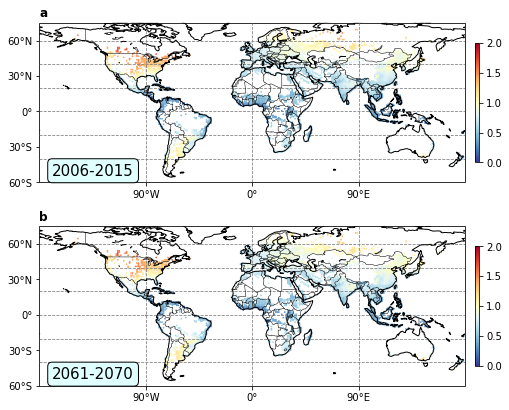

In [3]:
fig = plt.figure(figsize=(7.8,5.8))
cmap="RdYlBu_r"

save_dir = "../../data/model-validation/"
title_text_dict = {"2006":"a",
                   "2061":"b"}

var_text_dict = {"2006":"2006-2015",
                 "2061":"2061-2070"}

max_val={"2006":2,
         "2061":2}

min_val={"2006":0,
         "2061":0}

year_ls = ["2006","2061"]

for i in range(2):
    year = year_ls[i]
    df = pd.read_csv(save_dir+year+"/rmse_by_lat_lon_mean.csv")
#     df = pd.read_csv(save_dir+year+"/rmse_by_lat_lon_mean.csv",names=["lat", "lon", "0"])
    display(df.describe())
    plot_map(df.reset_index(),
             i,min_val[year], max_val[year],
             cmap,title_text_dict[year],var_text_dict[year])

plt.tight_layout()
plt.savefig("../../figures/figures_rmse.pdf",dpi=188)
plt.show()